In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("Whitegrid")
%matplotlib inline

In [7]:
import requests

from io import StringIO

In [8]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
txt= requests.get(url).text
data= StringIO(txt)

In [10]:
poll = pd.read_csv(data)

In [11]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [12]:
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


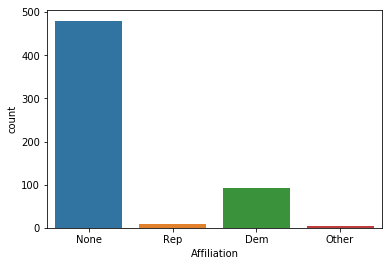

In [14]:
sns.countplot('Affiliation', data= poll)

In [19]:
poll['Population'].value_counts()

Likely Voters                 292
Registered Voters             252
Adults                         41
Likely Voters - Republican      1
Name: Population, dtype: int64

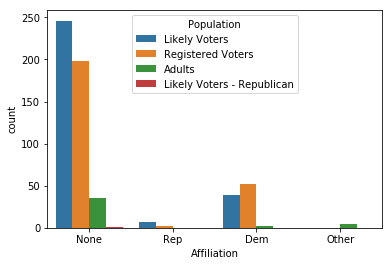

In [20]:
sns.countplot('Affiliation', data= poll, hue= 'Population')

In [26]:
avg = pd.DataFrame(poll.mean())
avg.head()

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


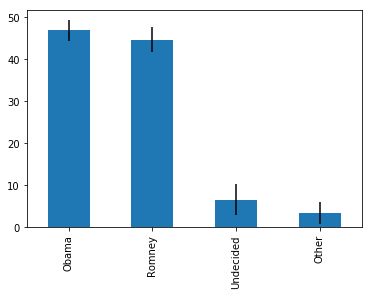

In [31]:
# get the average
avg = pd.DataFrame(poll.mean()) 
avg.drop(['Number of Observations','Question Text','Question Iteration'],axis=0,inplace=True)

# get the error
std = pd.DataFrame(poll.std())
std.drop(['Number of Observations','Question Text','Question Iteration'],axis=0,inplace=True)

# now plot using pandas built-in plot, with kind='bar' and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False)

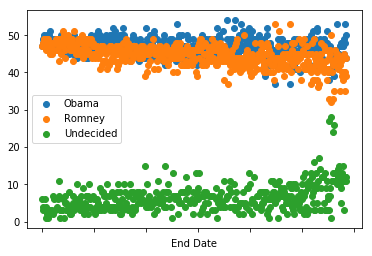

In [37]:
#Plot of sentiment in poll vs Time

poll.plot(x='End Date', y=['Obama','Romney','Undecided'], marker='o', linestyle='')

In [35]:
from datetime import datetime

In [38]:
#Creating a New Column to take into account difference between polls of Obama  and Romney

poll['Difference'] = (poll.Obama - poll.Romney)/100



poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [47]:
#Grouping using the strat date
poll_df = poll.groupby(['Start Date'], as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


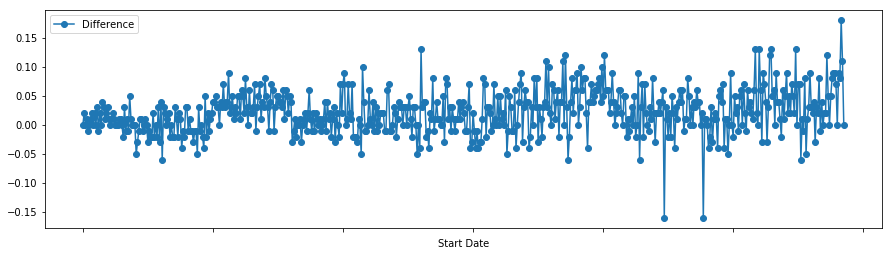

In [61]:
#plotting difference between romney and Obama

diff  = poll.plot('Start Date','Difference', marker = 'o', linestyle='-', figsize=(15,4))
plt.xlabel('Start Date')
plt.show()

In [63]:
# Set row count and xlimit list
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

325
352


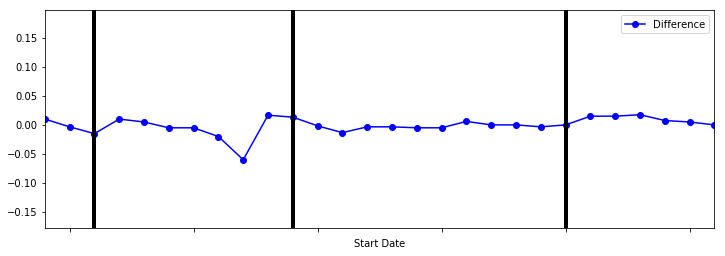

In [66]:
#plotting the figure again this time with the xlimits of october only
fig = poll_df.plot(x='Start Date',y='Difference',figsize=(12,4),marker='o',linestyle='-',color='blue',xlim=(329,356))

# Now add the debate markers to analyze how it affected the poll
plt.axvline(x=329+2, linewidth=4, color='black')
plt.axvline(x=329+10, linewidth=4, color='black')
plt.axvline(x=329+21, linewidth=4, color='black')

In [88]:
# Let us take the donor data into consideration

#1.) How much was donated and what was the average donation?
#2.) How did the donations differ between candidates?
#3.) How did the donations differ between Democrats and Republicans?
#4.) What were the demographics of the donors?
#5.) Is there a pattern to donation amounts?

#get the donor dataset save it in a dataframe

donor = pd.read_csv('Election_Donor_Data.csv')
donor.head(10)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [71]:
donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [74]:
#Finding the various amounts donated
donor['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [76]:
#there are a total of 8079 various amount donation
#Finding Average and Standard Deviation

avg = donor['contb_receipt_amt'].mean()

std = donor['contb_receipt_amt'].std()

print('the Mean is ' + str(avg) + 'the standard deviation is ' + str(std))

the Mean is 298.2351500951093the standard deviation is 3749.666723269043


In [80]:
top_donor = donor['contb_receipt_amt'].copy()

top_donor.sort_values(ascending = False, inplace= True)

top_donor

325136    2014490.51
326651    1944042.43
344539    1679114.65
344419    1511192.17
319478     526246.17
335187     512710.91
257270     451726.00
114754      33300.00
217891      25800.00
823345      25000.00
834301      25000.00
65131       12700.00
41888       10000.00
709859      10000.00
90076       10000.00
99829       10000.00
709268      10000.00
708928      10000.00
710730      10000.00
709813      10000.00
993178      10000.00
708138      10000.00
91145       10000.00
709739      10000.00
708919      10000.00
709608      10000.00
876244      10000.00
710177      10000.00
708898      10000.00
708022      10000.00
             ...    
54434       -5000.00
54430       -5000.00
7973        -5000.00
615101      -5000.00
707945      -5000.00
21164       -5000.00
416403      -5000.00
7361        -5000.00
946875      -5000.00
262328      -5000.00
21167       -5000.00
21168       -5000.00
21172       -5000.00
708929      -5000.00
708899      -5000.00
665887      -5000.00
708920      -

In [82]:
#Removing the nwgative values 

top_donor = top_donor[top_donor > 0]

top_donor.sort_values(ascending=False, inplace=True)

top_donor.value_counts()

100.00     178188
50.00      137584
25.00      110345
250.00      91182
500.00      57984
2500.00     49005
35.00       37237
1000.00     36494
10.00       33986
200.00      27813
20.00       17565
15.00       16163
150.00      14600
75.00       13647
201.20      11718
30.00       11381
300.00      11204
20.12        9897
5.00         9024
40.00        5007
2000.00      4128
55.00        3760
1500.00      3705
3.00         3383
60.00        3084
400.00       3066
110.00       2554
125.00       2520
19.00        2474
112.00       2457
            ...  
102.85          1
1223.00         1
197.16          1
74.38           1
878.74          1
44.85           1
197.59          1
160.93          1
97.65           1
114.43          1
80.73           1
77.13           1
115.07          1
213.69          1
70.76           1
144.13          1
97.15           1
188.65          1
499.66          1
53.11           1
203.16          1
203.84          1
78.62           1
47.40           1
17.05     

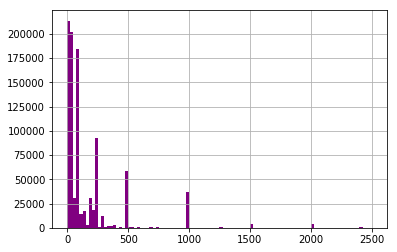

In [83]:
comm_don = top_donor[top_donor <2500]

comm_don.hist(bins=100, color='purple')

In [84]:
# Exploring how many unique candidate names are present in this dataset

candidates = donor.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [89]:
#Created a dictionary to map the party values on the donor dataframe
dict = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

#mapping the dict

donor['Party'] = donor.cand_nm.map(dict)

In [90]:
donor.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [91]:
#DRopping all the negative contribution amounts from our dataframe

donor = donor[donor.contb_receipt_amt >0]

In [94]:
donor.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [97]:
#calculation the sum on amount by each cadidate
cand_am = donor.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_am

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

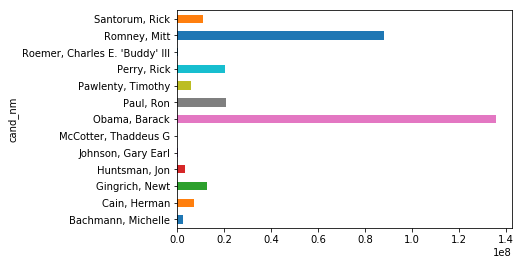

In [99]:
#displaying the results by visulizing 
cand_am.plot(kind='barh')

In [101]:
#grouped the data by party and summed the contribution amount values
party_am = donor.groupby('Party')['contb_receipt_amt'].sum()

party_am

Party
Democrat      1.358774e+08
Republican    1.736539e+08
Name: contb_receipt_amt, dtype: float64

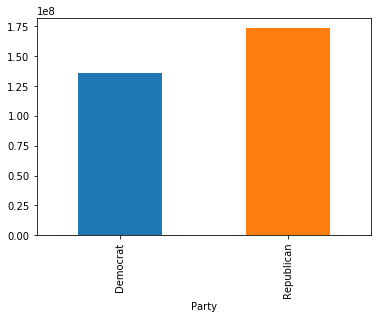

In [104]:
#visualized the results
party_am.plot(kind='bar')

In [107]:
#Exploring the Occupations of the people who have donated 

occ = donor.pivot_table('contb_receipt_amt',
                        index = 'contbr_occupation',
                        columns = 'Party',
                        aggfunc = 'sum')

occ.head(10)

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.6
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.0
(RETIRED),NaN,250.0
-,5000.0,2114.8


In [109]:
occ.shape

(45067, 2)

In [110]:
#that are too many occupations to be visualized
#lets visualize only the occcupation groups who have contributed large amount

occ = occ[occ.sum(1) > 1000000]

In [111]:
occ.head(10)

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
BANKER,224084.40,1259468.73
BUSINESS OWNER,449979.30,1323342.43
C.E.O.,1690.00,2592983.11
CEO,2073284.79,1618057.41
CHAIRMAN,496547.00,1296092.75
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09


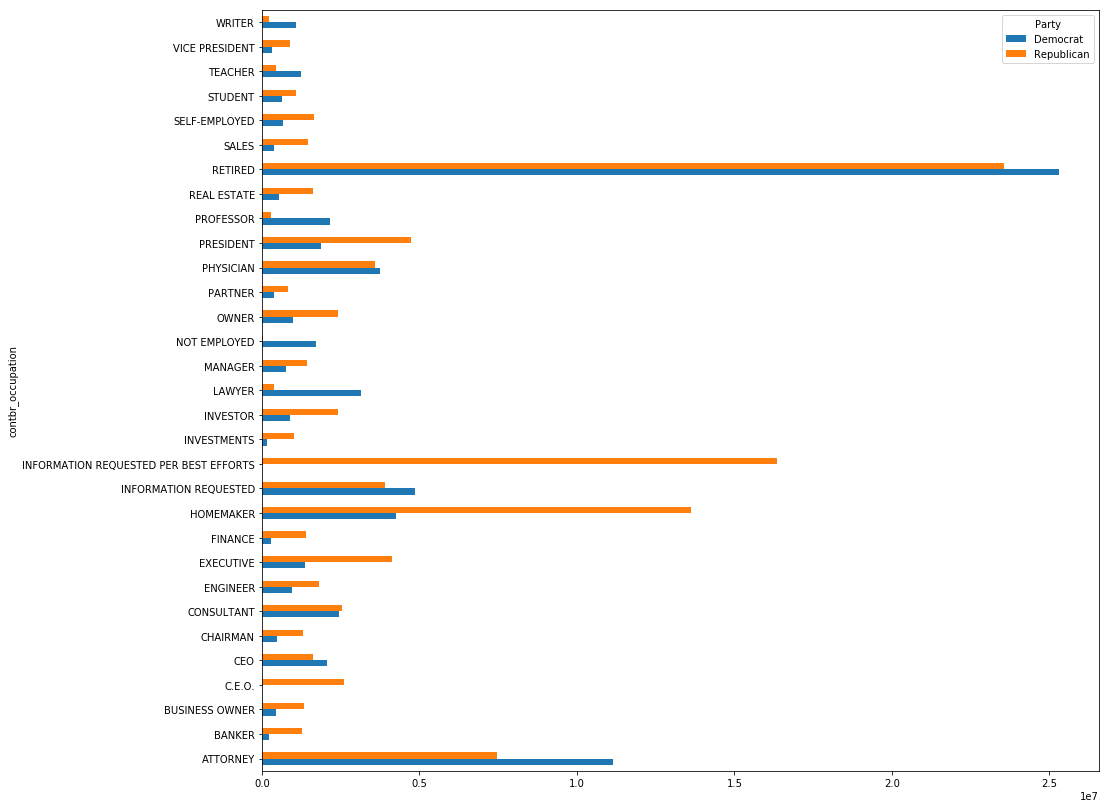

In [119]:
occ.plot(kind ='barh', figsize=(15,14))


In [120]:
occ.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [122]:
# Set new ceo row as sum of the current two
occ.loc['CEO'] = occ.loc['CEO'] + occ.loc['C.E.O.']
# Drop CEO
occ.drop('C.E.O.',inplace=True)

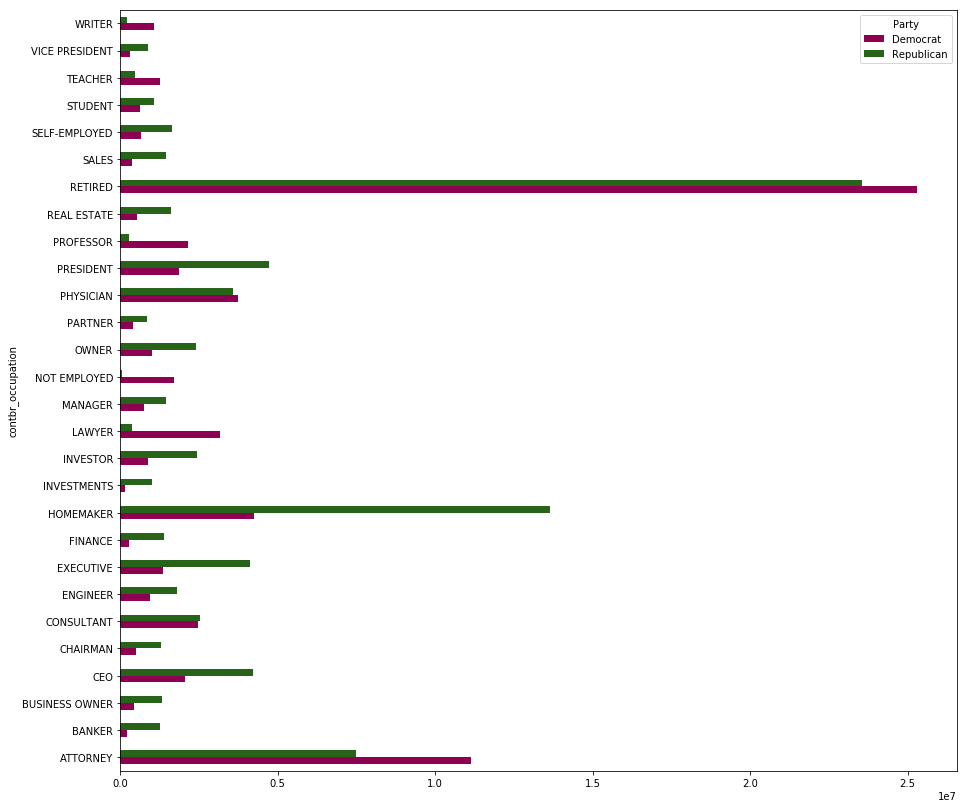

In [123]:
#Displaying again 

occ.plot(kind = 'barh', figsize = (15,14), cmap = 'PiYG')